# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
df1 = pd.read_csv(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\OPCC\opc_chunk1.csv')
#load dataframe chunk one

In [4]:
df2 = pd.read_csv(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\OPCC\opc_chunk2.csv')
#load dataframe chunk two

In [8]:
df3 = pd.read_csv(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\OPCC\opc_chunk3.csv')
#load dataframe chunk three

In [10]:
df4 = pd.read_csv(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\OPCC\opc_chunk4.csv')
#load dataframe chunk four

In [13]:
df5 = pd.read_csv(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\customers_check.csv')
#load customers dataframe

# Data Merge

In [93]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
#remove unnamed column

In [94]:
df2 = df2.loc[:, ~df2.columns.str.contains('^Unnamed')]
#remove unnamed column

In [95]:
df3 = df3.loc[:, ~df3.columns.str.contains('^Unnamed')]
#remove unnamed column

In [96]:
df4 = df4.loc[:, ~df4.columns.str.contains('^Unnamed')]
#remove unnamed column

In [97]:
df5 = df5.loc[:, ~df5.columns.str.contains('^Unnamed')]
#remove unnamed column

In [98]:
ddf_opc = pd.concat([df1, df2, df3, df4], ignore_index=True)
#combine chunked dataframes

In [99]:
df_insta_opc = ddf_opc.merge(df5, on='user_id', indicator=True)
#merge df5 customer data into instacart dataframe

In [139]:
df_insta_opc.head(5)
#display first row of new dataframe

,order_id,user_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,spending_flag,user_frequency,median_days_since_prior,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,2539329,1,1,2,8,NaN,True,196.0,1.0,0.0,...,Low spender,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423
1,2398795,1,2,3,7,15.0,False,196.0,1.0,1.0,...,Low spender,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423
2,473747,1,3,3,12,21.0,False,196.0,1.0,1.0,...,Low spender,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423
3,2254736,1,4,4,7,29.0,False,196.0,1.0,1.0,...,Low spender,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423
4,431534,1,5,4,15,28.0,False,196.0,1.0,1.0,...,Low spender,Non-frequent customer,20.5,Female,Alabama,31,NaT,3,married,40423


In [141]:
df_insta_opc['n_dependants'].max()

3

In [142]:
df_insta_opc['n_dependants'].min()

0

In [143]:
df_insta_opc['n_dependants'].mean()

1.5018721281096639

In [101]:
df_insta_opc = df_insta_opc.drop(columns=['_merge'])
#drop merge column

In [102]:
df_insta_opc.drop(columns=['_merge'], inplace=True)
#define dataframe without this column

KeyError: "['_merge'] not found in axis"

In [103]:
df_insta_opc.columns

Index(['order_id', 'user_id', 'order_number', 'day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'first_order_flag',
       'product_id', 'add_to_cart_order', 'reordered', 'product_name',
       'aisle_id', 'department_id', 'prices', 'max_order', 'loyalty_flag',
       'avg_price_per_user', 'spending_flag', 'user_frequency',
       'median_days_since_prior', 'Gender', 'STATE', 'Age', 'date_joined',
       'n_dependants', 'fam_status', 'income'],
      dtype='object')

In [104]:
df_insta_opc.dtypes
#confirm dtypes after merge 

order_id                     int64
user_id                      int64
order_number                 int64
day_of_week                  int64
order_hour_of_day            int64
days_since_prior_order     float64
first_order_flag              bool
product_id                 float64
add_to_cart_order          float64
reordered                  float64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
max_order                    int64
loyalty_flag                object
avg_price_per_user         float64
spending_flag               object
user_frequency              object
median_days_since_prior    float64
Gender                      object
STATE                       object
Age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
dtype: object

In [105]:
df_insta_opc['product_name'] = df_insta_opc['product_name'].astype(str)

In [106]:
df_insta_opc['Gender'] = df_insta_opc['Gender'].astype(str)

In [107]:
df_insta_opc['STATE'] = df_insta_opc['STATE'].astype(str)

In [108]:
df_insta_opc['fam_status'] = df_insta_opc['fam_status'].astype(str)

In [109]:
df_insta_opc['date_joined'] = pd.to_datetime(df_insta_opc['date_joined'])

In [110]:
df_insta_opc['user_frequency'] = df_insta_opc['user_frequency'].astype('category')

In [111]:
df_insta_opc.dtypes
#confirm dtype changes

order_id                            int64
user_id                             int64
order_number                        int64
day_of_week                         int64
order_hour_of_day                   int64
days_since_prior_order            float64
first_order_flag                     bool
product_id                        float64
add_to_cart_order                 float64
reordered                         float64
product_name                       object
aisle_id                            int64
department_id                       int64
prices                            float64
max_order                           int64
loyalty_flag                       object
avg_price_per_user                float64
spending_flag                      object
user_frequency                   category
median_days_since_prior           float64
Gender                             object
STATE                              object
Age                                 int64
date_joined                datetim

# Visualizations

## Bar Chart: orders day of week

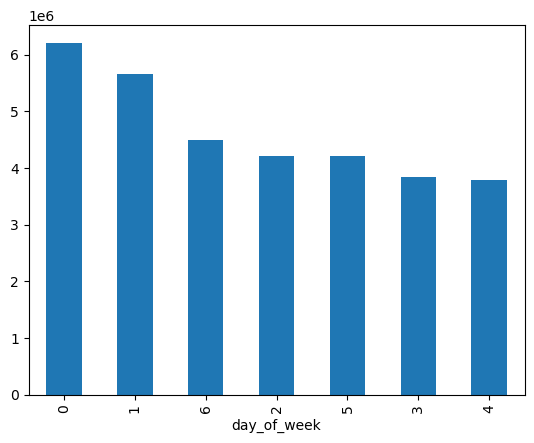

In [55]:
bar = df_insta_opc['day_of_week'].value_counts().plot.bar()
#save bar chart to Jupyter memory

In [64]:
path = r'C:\Users\user\Instacart Project\04 Analysis'
#define path for export

In [63]:
bar.figure.savefig(os.path.join(path, 'Visualizations', 'bar_orders.dow.png'))
#export bar chart

FileNotFoundError: [Errno 2] No such file or directory: '~\\Instacart Project\\04 Analysis\\Visualizations\\bar_orders.dow.png'

## Histogram: prices & frequency of purchase

<Axes: ylabel='Frequency'>

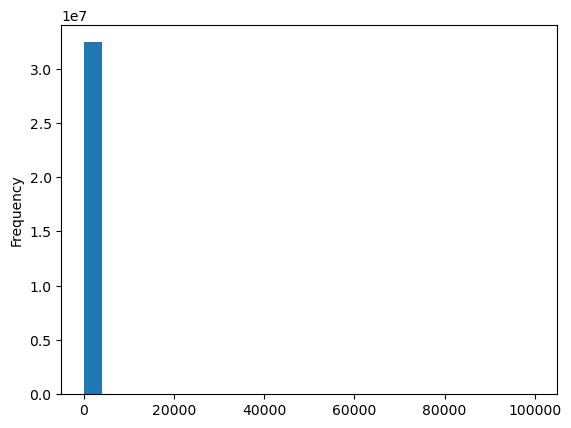

In [65]:
df_insta_opc['prices'].plot.hist(bins = 25)
#create histogram on prices column

In [71]:
pip install --upgrade seaborn pandas


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/7b/e5/83fcd7e9db036c179e0352bfcd20f81d728197a16f883e7b90307a88e65e/seaborn-0.13.0-py3-none-any.whl.metadata
  Obtaining dependency information for pandas from https://files.pythonhosted.org/packages/97/d8/dc2f6bff06a799a5603c414afc6de39c6351fe34892d50b6a077df3be6ac/pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/294.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.6 kB ? eta -:--:--
   ---------------- ----------------------- 122.9/294.6 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.6/294.6 kB 2.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/10.6 MB 16.2 MB/s eta 0:00:01
   ------ --------------------------------- 1.6/10.6 MB 16.9 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/10.6 MB 26.0 MB/

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'e:\\python\\lib\\site-packages\\pandas\\_libs\\algos.cp311-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [72]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
#ignore any future warnings of deprecated commands

In [66]:
df_insta_opc['prices'].mean()

11.981143910633602

In [67]:
df_insta_opc['prices'].median()

7.4

In [68]:
df_insta_opc['prices'].max()

99999.0

E:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
E:\python\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='prices', ylabel='prices'>

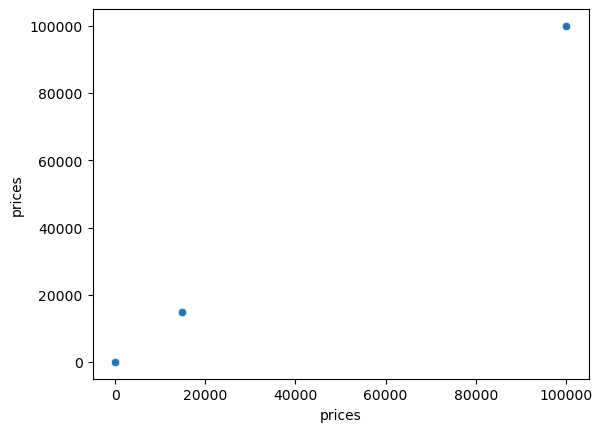

In [70]:
sns.scatterplot(x= 'prices', y= 'prices', data = df_insta_opc)
#create scatterplot

In [73]:
df_insta_opc.loc[df_insta_opc['prices']> 100]
#return any product prices above 100 dollars

,order_id,user_id,order_number,day_of_week,order_hour_of_day,days_since_prior_order,first_order_flag,product_id,add_to_cart_order,reordered,...,spending_flag,user_frequency,median_days_since_prior,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
7816,1435153,1519,26,2,11,6.0,False,21553.0,15.0,0.0,...,True,Frequent customer,6.0,Male,Rhode Island,68,2020-04-03,0,divorced/widowed,177864
7817,1066435,1519,32,3,10,5.0,False,21553.0,28.0,1.0,...,True,Frequent customer,6.0,Male,Rhode Island,68,2020-04-03,0,divorced/widowed,177864
15172,1697208,2409,33,1,19,5.0,False,21553.0,1.0,0.0,...,True,Frequent customer,5.0,Female,Hawaii,55,2018-11-11,2,married,230074
20294,965345,3531,27,2,19,8.0,False,33664.0,2.0,0.0,...,True,Frequent customer,9.0,Female,Hawaii,80,2019-06-10,2,married,233776
20528,2943740,3793,1,2,9,NaN,True,21553.0,3.0,0.0,...,True,Frequent customer,2.0,Male,Louisiana,59,NaT,3,married,182933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32333019,3265389,51346,4,1,17,13.0,False,33664.0,2.0,1.0,...,True,Regular customer,13.0,Male,Rhode Island,58,NaT,1,married,207497
32337105,1179092,131671,12,4,9,15.0,False,33664.0,1.0,0.0,...,True,Regular customer,11.0,Female,Rhode Island,35,2018-04-08,0,single,86490
32340034,1226705,39667,7,2,15,20.0,False,33664.0,14.0,0.0,...,True,Non-frequent customer,23.0,Male,Rhode Island,78,2019-08-05,2,married,195077
32359285,3000037,95105,2,4,19,22.0,False,33664.0,4.0,0.0,...,True,Frequent customer,6.0,Female,South Carolina,48,NaT,2,married,398880


In [74]:
df_insta_opc.loc[df_insta_opc['prices'] >100, 'prices'] = np.nan
#mark any values above 100 in this column as nan

In [75]:
df_insta_opc['prices'].max()

25.0

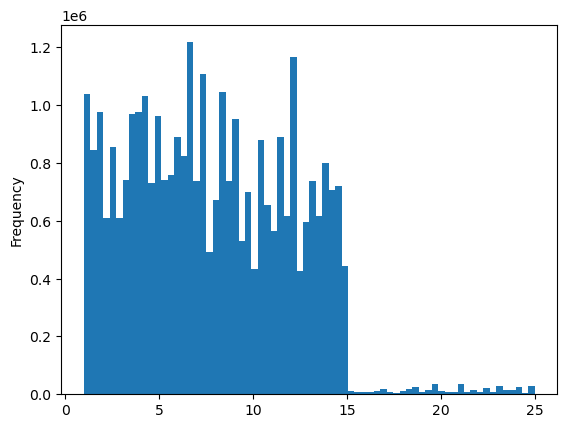

In [76]:
hist2 = df_insta_opc['prices'].plot.hist(bins = 70)
#create histogram of prices column with new changes

In [77]:
hist2.figure.savefig(os.path.join(path, 'Visualizations', 'histo_prices.dow.png'))
#export histogram chart

## Line Chart: sample data of prices and days of week

In [78]:
np.random.seed(4)

In [80]:
dev = np.random.rand(len(df_insta_opc)) <= 0.7
#create a 70 30 sample for study

In [81]:
big = df_insta_opc[dev]
#70 percent of data sample

In [82]:
small = df_insta_opc[~dev]
#30 percent of data sample

In [83]:
len(df_insta_opc)

32434212

In [84]:
len(big) + len(small)

32434212

In [85]:
df_2 = small [['day_of_week', 'prices']]
#command to create dataframe of small sample containing info from prices and day of week columns

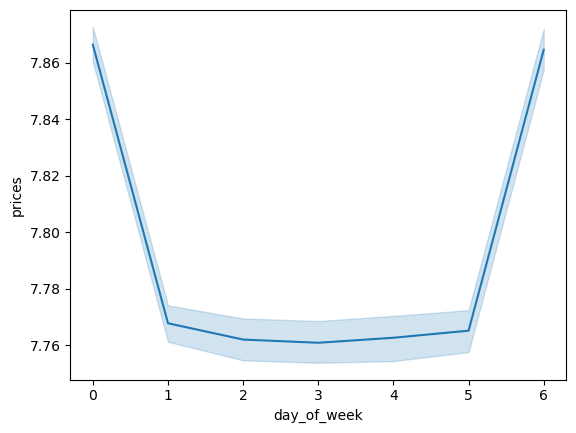

In [86]:
line = sns.lineplot(data = df_2, x= 'day_of_week', y = 'prices')
#create line chart with sample data

In [87]:
line.figure.savefig(os.path.join(path, 'Visualizations', 'line_prices_weekdays.dow.png'))
#export line chart

## Histogram: sales and order hour of day

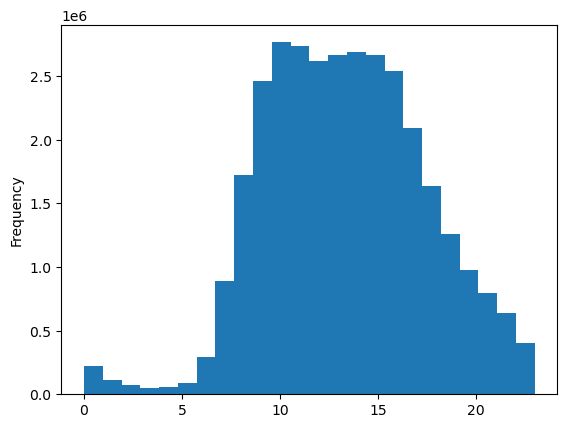

In [88]:
hist_ordhour = df_insta_opc['order_hour_of_day'].plot.hist(bins=24)
#histogram studying orders per hour of day

Orders by hour of day are marked in military time (10 = 1000 or 10:00, 15 = 1500 or 3:00pm). This chart demonstrates that the largest number of customer orders by hour of day is between 0900 and 1600 hours (9am and 4pm)

In [89]:
hist_ordhour.figure.savefig(os.path.join(path, 'Visualizations', 'his_ordhour.dow.png'))
#export histogram chart

## Bar Chart: order distribution among loyal customers

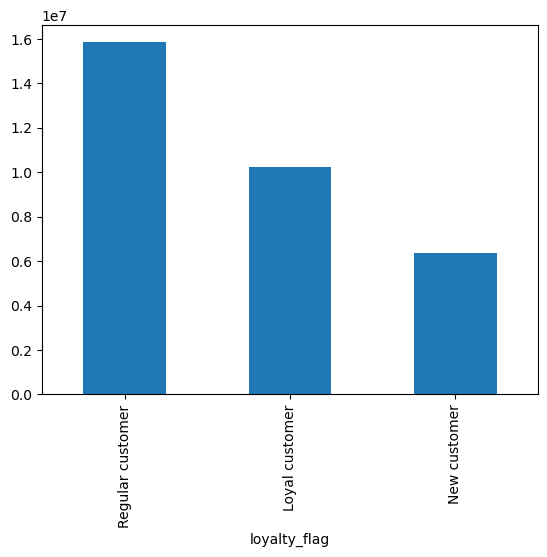

In [112]:
bar_loyal = df_insta_opc['loyalty_flag'].value_counts().plot.bar()
#create and save bar chart to Jupyter memory

In [113]:
print(df_insta_opc['loyalty_flag'].value_counts())

loyalty_flag
Regular customer    15832287
Loyal customer      10246255
New customer         6355670
Name: count, dtype: int64


This bar chart indicates that regular customers have the most orders; y-axis indicates number of orders in thousands

In [114]:
bar_loyal.figure.savefig(os.path.join(path, 'Visualizations', 'bar_loyal.dow.png'))
#export bar chart

## Line Chart: Order hour of day and relation to prices

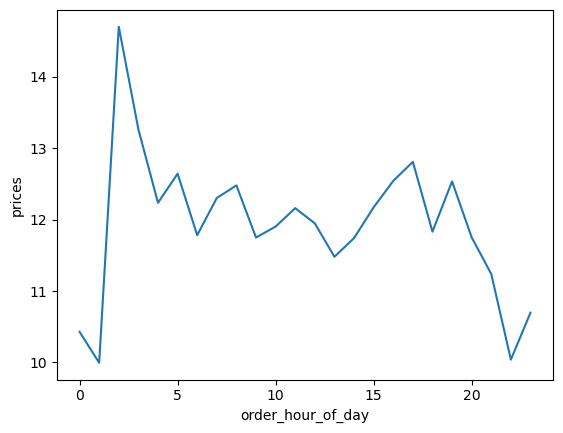

In [136]:
line = sns.lineplot(data=line_hour_price, x='order_hour_of_day', y='prices')
#line chart to study prices in relation to hour of the day

In [135]:
line.figure.savefig(os.path.join(path, 'Visualizations', 'line_hour_price.dow.png'))
#export chart

## Line Chart: Relation of age and family situation/dependents

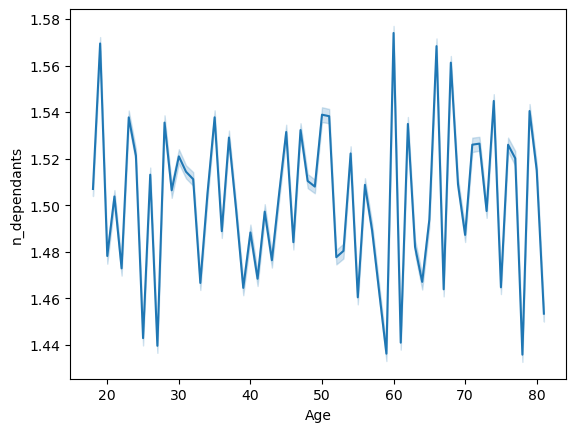

In [137]:
line_age_dependents = sns.lineplot(data=df_insta_opc, x='Age', y='n_dependants')
#command to study relation between age and number of depenedents or familiar situation

This chart takes the average number of dependents when compared to the ages of Instacart customers. However, this chart does not present an accurate representation of a relationship between age and number of depenedents. 

In [144]:
line_age_dependents.figure.savefig(os.path.join(path, 'Visualizations', 'line_age_dependents.png'))
#export chart

## Scatterplot: relationship between age and spending power

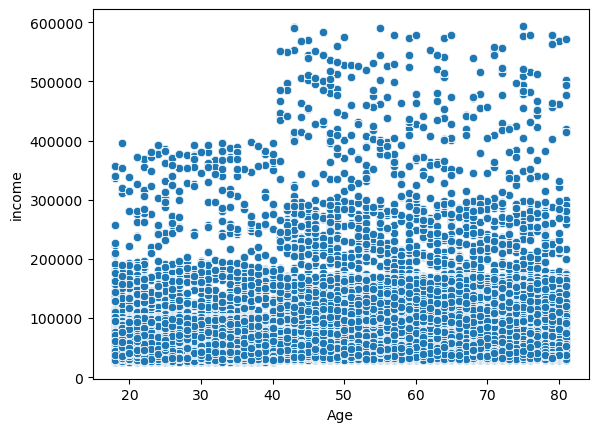

In [145]:
scatter_age_income = sns.scatterplot(data=df_insta_opc, x='Age', y='income')
#determine if relationship betweeen age and spending power

This scatterplot would suggest that the average spending power of most customers between 20 and 80 years of age is around 200,000 USD. There are a few individuals up to $400,000 between 20y and 40y, and a handful of customers between 40y and 80y that have spending power up to $600,000. 

In [146]:
scatter_age_income.figure.savefig(os.path.join(path, 'Visualizations', 'scatter_age_income.png'))

# Export Dataframe

In [147]:
path = r'C:\Users\user\Instacart Project'

In [149]:
df_insta_opc.to_pickle(r'C:\Users\user\Instacart Project\02 Data\Prepared Data\instacart_dataframe.pkl')